In [19]:
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib.image as mpimg
import glob
import json
import os

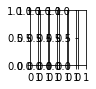

In [20]:
lbls = ["globules", "milia_like_cyst", "negative_network", "pigment_network", "streaks"]

In [21]:
def parse_log(path_to_log:str):
    f = os.path.join(path_to_log, "train_metrics.json")
    with open(f, "r") as file:
        text = "\n".join(file.readlines())
        dct = json.loads(text)
    epochs = list(dct.keys())
    epoch_values = [dct[e] for e in epochs]
    epochs = list(map(lambda x: int(x), epochs))
    return list(zip(epochs, epoch_values))

epoch_value = parse_log("/Users/nduginets/Desktop/tmp")

<Figure size 432x288 with 0 Axes>

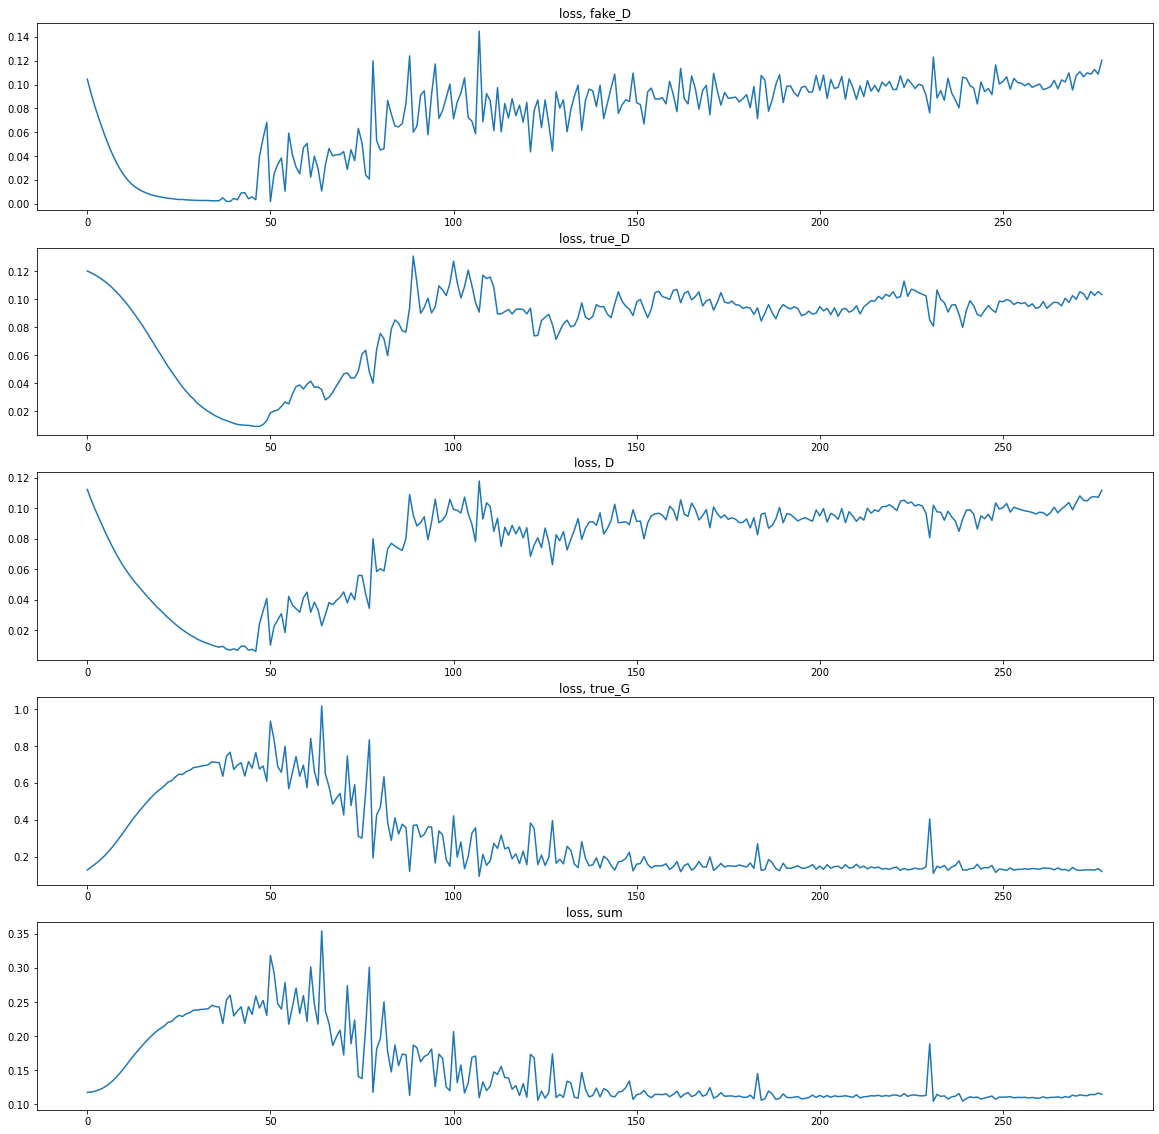

In [25]:
def draw_metric_by_path(epoch_value_list:list, base_path, *sub_path):
    plt.clf()
    fig, plots = plt.subplots(nrows=len(sub_path), figsize = (20,20))
    def iterate(path, item):
        root = item
        for i in path:
            root = root[i]
        return root

    def draw_single_path(sub_plot, path):

        epochs = [e for e, _ in epoch_value_list]
        values = [iterate(path, v) for e, v in epoch_value_list]
        sub_plot.set_title(", ".join(path))
        sub_plot.plot(epochs, values)

    for idx, i in enumerate(sub_path):
        p = [base_path, i]
        draw_single_path(plots[idx], p)
    plt.show()



draw_metric_by_path(epoch_value, "loss", "fake_D", "true_D", "D", "true_G", "sum")